### Predict automobile price using Machine Learning
Use Machine learning to predict the price of a car based on several characteristics. The objective is to 
build a model to understand the factors that drive the car of the price. This will help your automobile 
company launch their new car in the market effectively by pricing it better.

### Tasks:
- Perform EDA on the data
- Perform data cleanup as required
- Pick the best variable for making a simple linear regression model
- Perform train test split
- Build model using best variable and report the R2
- Make a multiple regression model
o Apply feature selection approaches discussed in the class
- Final model should be interpretable
o What is your understanding of the factors that drive price?

###  Importing libraries 

In [257]:
import numpy as  np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [258]:
df = pd.read_csv('AutoData (1).csv')

### - Perform EDA on the data

In [259]:
type(df)

pandas.core.frame.DataFrame

In [260]:
df.shape

(205, 25)

In [261]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [262]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [263]:
df.describe(include= 'all')

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,147,2,2,2,5,3,2,NaN,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,185,168,115,96,120,202,NaN,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [265]:
len(df.columns)

25

In [266]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### Perform data cleanup as required

In [267]:
df.isna().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

  - there is no null  values in dataset

In [268]:
#  correlation
df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<AxesSubplot:>

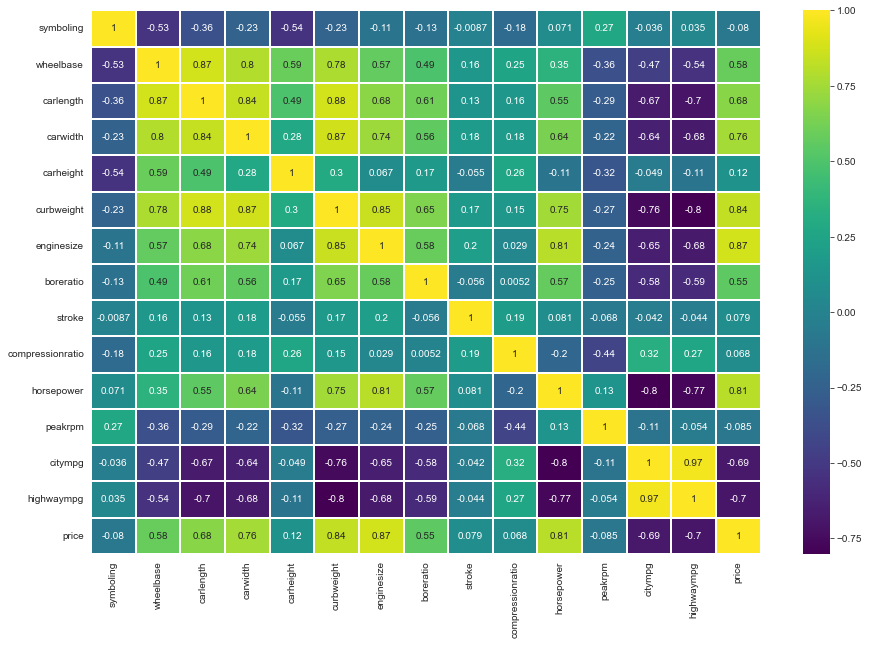

In [396]:
#heatmap for visualize the correlation values for better understanding purpose
plt.figure(figsize = (15,10))
sns.set_style('whitegrid')
sns.heatmap(data = df.corr() , annot = True,cmap='viridis',linecolor= 'white' ,linewidths= '0.1')

### 
Price is highly +ve correlated with  carwidth, curbweight, enginesize, horsepower.

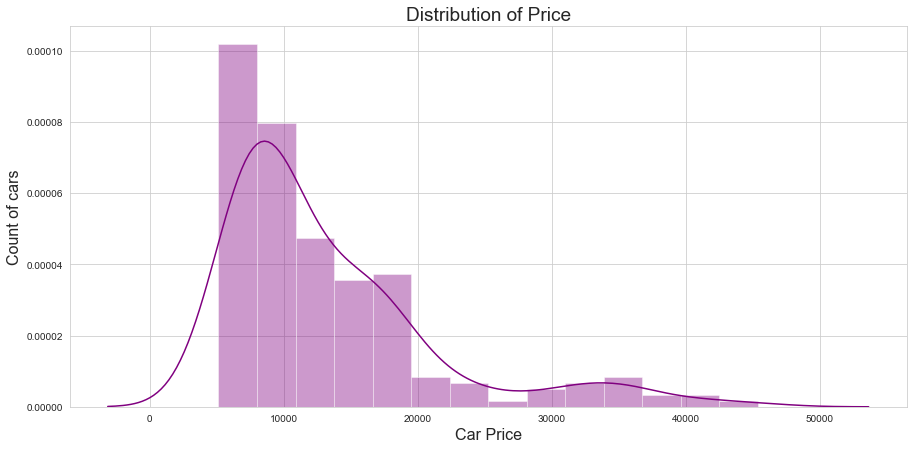

In [270]:
# Displot for price:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(15,7))
sns.distplot(df['price'], kde=True, color='purple',)
plt.xlabel('Car Price',size=16)
plt.ylabel('Count of cars' ,size=16)
plt.title('Distribution of Price',size=19)
plt.show()

In [271]:
# Categorical Columns
categorical=[]
for i in df :
    if df[i].dtypes == 'O':
        categorical.append(i)
print('Categorical  = ' , categorical)        

Categorical  =  ['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [272]:
# Numerical columns
numerical=[]
for i in df:
     if df[i].dtypes!= 'O' :
        numerical.append(i)
print('Numerical =',numerical)    

Numerical = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


### Outliers

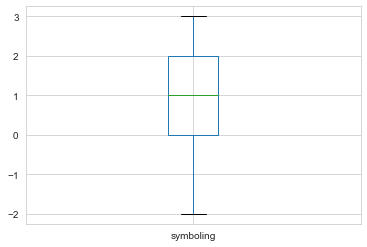

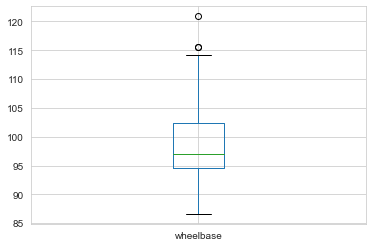

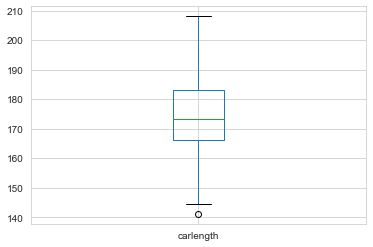

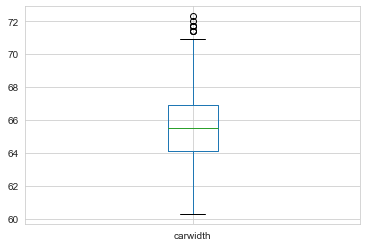

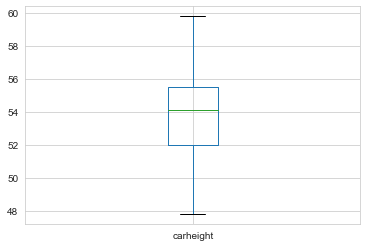

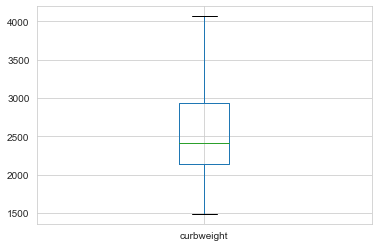

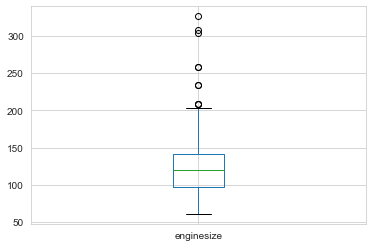

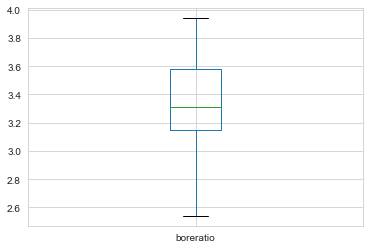

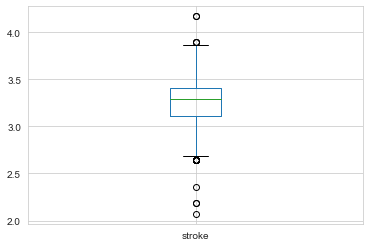

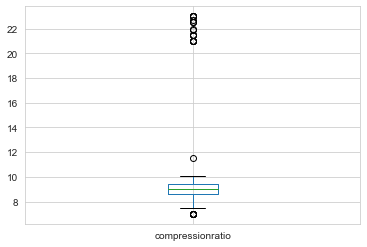

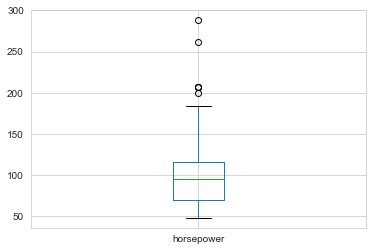

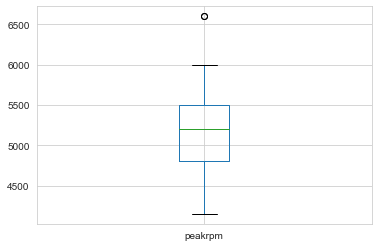

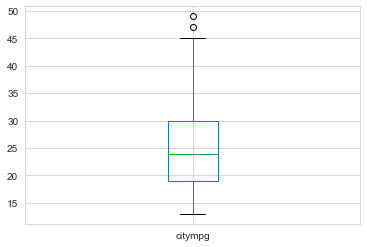

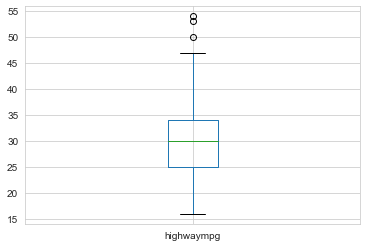

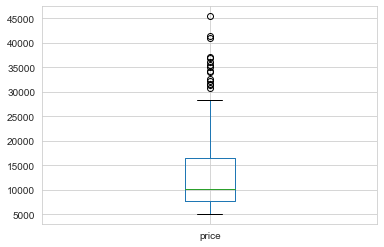

In [273]:
# outliers in all Numerical variables columns
for i in numerical :
    df.boxplot(i)
    plt.show()

In [274]:
# new data frame for categorical features 
dfc = df.loc[:,categorical] 
dfc.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [275]:
# new data frame for numerical features
dfn = df.loc[:,numerical]
dfn.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [276]:
# to  see the unique in categorical 
dfc.nunique()

make              147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [277]:
# Fuel Type
dfc['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

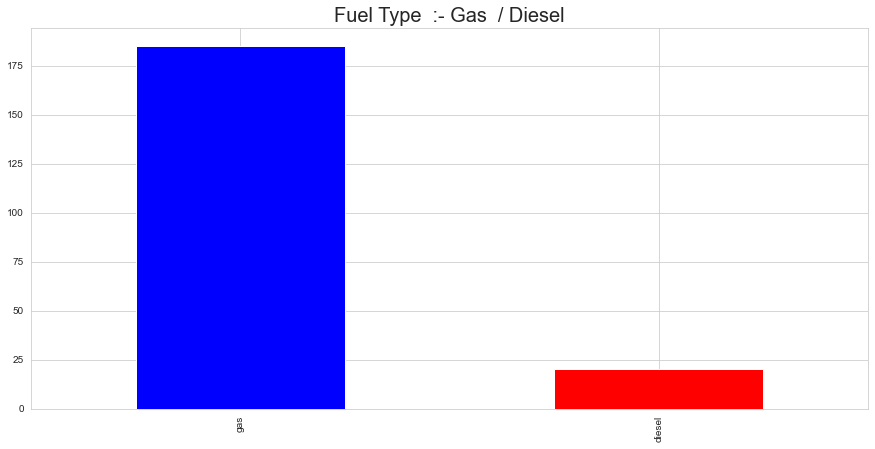

In [278]:
#  Bar chart for Fuel Type:
plt.figure(figsize=(15,7))
dfc['fueltype'].value_counts().plot(kind='bar',color=['b','r'],)
plt.title('Fuel Type  :- Gas  / Diesel',size=20)
plt.show()

As we can see that Gas type cars are selling more in terms of fuel.

In [279]:
# Engine Type
dfc.enginetype.unique() 

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

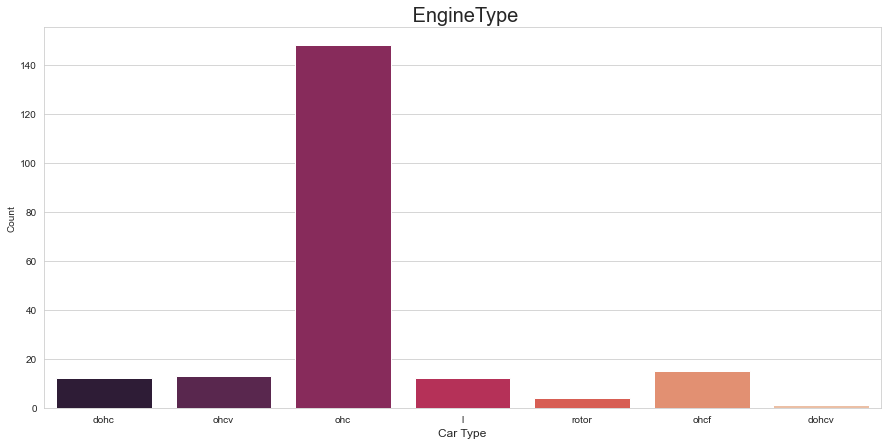

In [280]:
plt.figure(figsize=(15,7))
sns.countplot(dfc['enginetype'], palette=("rocket"))
plt.title(' EngineType',size=20)
plt.xlabel('Car Type', size=12)
plt.ylabel('Count')
plt.show()

  we can see ohc  car type is selling more

In [281]:
#Fuel System
dfc.fuelsystem.unique() 

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

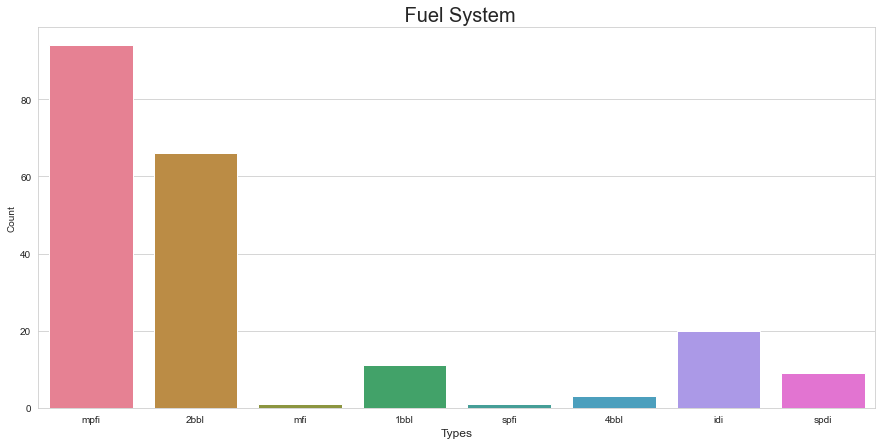

In [282]:
plt.figure(figsize=(15,7))
sns.countplot(dfc['fuelsystem'], palette=("husl"))
plt.title(' Fuel System',size=20)
plt.xlabel('Types', size=12)
plt.ylabel('Count')
plt.show()

cars having mpfi fuel system are selling the most

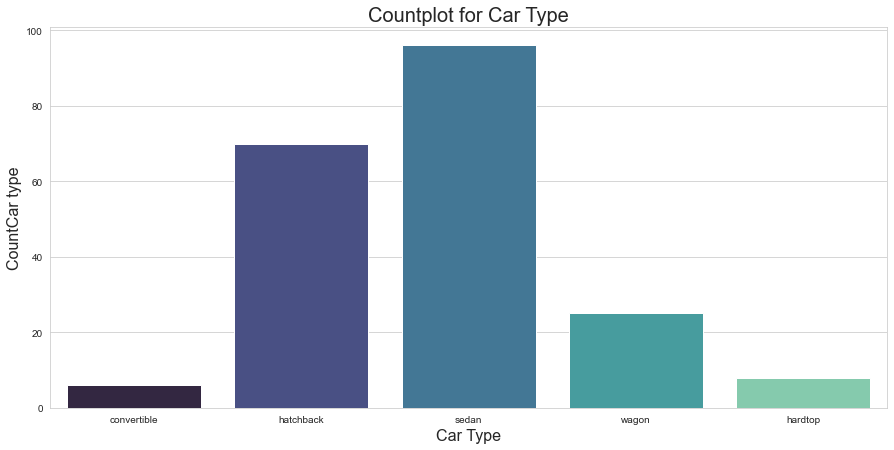

In [283]:
#  Bar chart for carbody:
plt.figure(figsize=(15,7))
sns.countplot(dfc['carbody'], palette=("mako"))
plt.title('Countplot for Car Type',size=20)
plt.xlabel('Car Type', size=16)
plt.ylabel('CountCar type',size=16)
plt.show()

Sedan cars are the best selling cars.

In [284]:
# get to know about column Make
df.loc[:,['make']]

,make
0,alfa-romero giulia
1,alfa-romero stelvio
2,alfa-romero Quadrifoglio
3,audi 100 ls
4,audi 100ls
...,...
200,volvo 145e (sw)
201,volvo 144ea
202,volvo 244dl
203,volvo 246


In [285]:
# car company name from make column
company_name= dfc['make'].apply(lambda x: x.split(" ")[0])
df['company']=company_name
df['company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

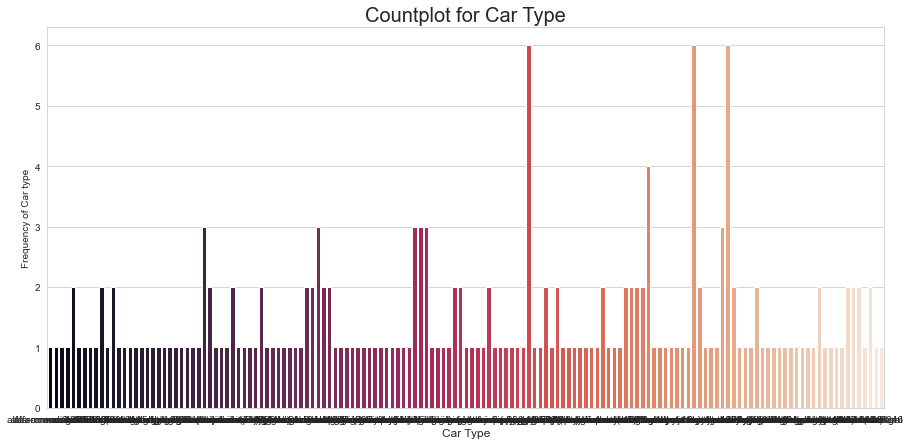

In [286]:
# Bar chart for carbody:
plt.figure(figsize=(15,7))
sns.countplot(df['make'], palette=("rocket"))
plt.title('Countplot for Car Type',size=20)
plt.xlabel('Car Type', size=12)
plt.ylabel('Frequency of Car type')
plt.show()

In [287]:
# Drop the make column as it has very large unique featuures
dfc.drop(['make'],axis=1, inplace =True)

In [288]:
dfc.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [289]:
# for changing categorical features in Numerical 

In [290]:
from sklearn.preprocessing import LabelEncoder

In [291]:
 LabelEncoder()

LabelEncoder()

In [292]:
catdf=dfc.apply(LabelEncoder().fit_transform)

In [293]:
catdf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,1,0,1,0,2,0,0,2,5
1,1,0,1,0,2,0,0,2,5
2,1,0,1,2,2,0,5,3,5
3,1,0,0,3,1,0,3,2,5
4,1,0,0,3,0,0,3,1,5


# -
we have converted all Catogerical feature in numeric feature

In [294]:
datadf = catdf.join(dfn)

In [295]:
datadf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,5,3,5,1,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,3,2,5,2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,3,1,5,2,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


### #  Pick the best variable for making a simple linear regression model

In [296]:
datadf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,5,3,5,1,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,3,2,5,2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,3,1,5,2,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [297]:
datadf.describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,3.014634,2.117073,3.253659,0.834146,...,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,1.054765,0.795792,2.013204,1.245307,...,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,...,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,3.000000,2.000000,1.000000,0.000000,...,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,3.000000,2.000000,5.000000,1.000000,...,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,3.000000,2.000000,5.000000,2.000000,...,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,6.000000,6.000000,7.000000,3.000000,...,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [298]:
x = datadf.drop('price',axis=1)
y= datadf.loc[:,['price']]

In [299]:
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,2,2,0,5,3,5,1,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,3,1,0,3,2,5,2,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,3,0,0,3,1,5,2,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [300]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [301]:
from sklearn.ensemble import ExtraTreesRegressor

In [302]:
model = ExtraTreesRegressor()

In [303]:
model.fit(x,y)

C:\Users\ravAn\AppData\Local\Temp/ipykernel_20920/1265173374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


ExtraTreesRegressor()

In [304]:
model.feature_importances_

array([0.00172937, 0.0137734 , 0.00293381, 0.0068689 , 0.10317022,
       0.02468049, 0.00419518, 0.01290611, 0.02117127, 0.00327865,
       0.0138089 , 0.01901619, 0.06828062, 0.00596573, 0.1906366 ,
       0.2072906 , 0.01169221, 0.00609469, 0.00479114, 0.12189183,
       0.01369849, 0.08000075, 0.06212486])

In [305]:
datadf.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### 
the most important fetures in the dataset and those columns are 'curbweight' ,'enginesize' and 'horsepower'

In [306]:
## Relation between 'price' and 'curbweight' ,'enginesize' and 'horsepower'

<AxesSubplot:xlabel='price', ylabel='curbweight'>

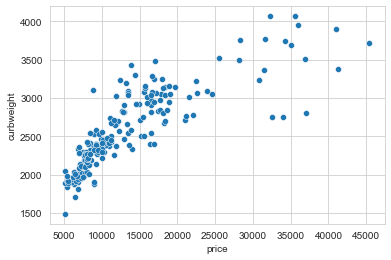

In [307]:
#relation of curbweight with price
sns.scatterplot(data =datadf , x = 'price' ,y = 'curbweight')

<AxesSubplot:xlabel='price', ylabel='enginesize'>

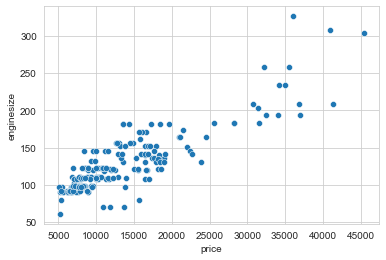

In [308]:
#relation of  enginesize with price
sns.scatterplot(data =datadf , x = 'price' ,y = 'enginesize')

<AxesSubplot:xlabel='price', ylabel='horsepower'>

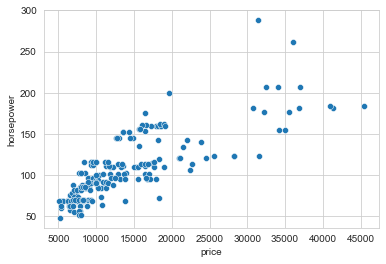

In [309]:
  #relation of  horsepower with price
sns.scatterplot(data =datadf , x = 'price' ,y = 'horsepower')

In [310]:
## finding outliers curbweight' ,'enginesize' and 'horsepower'

<AxesSubplot:xlabel='curbweight'>

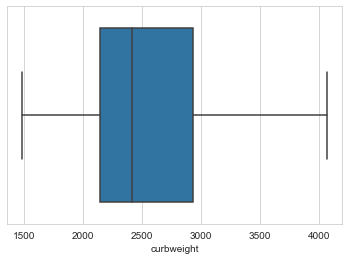

In [311]:
sns.boxplot(datadf['curbweight'])

we found  no outliers in curbwiegth

<AxesSubplot:xlabel='enginesize'>

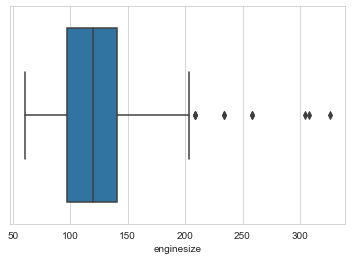

In [312]:
sns.boxplot(datadf['enginesize'])

### 
droping outliers from enginesize

In [313]:
datadf['enginesize'] >200

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: enginesize, Length: 205, dtype: bool

In [314]:
sum(datadf['enginesize'] >200)

11

In [315]:
datadf[datadf['enginesize'] >200].index

Int64Index([15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 129], dtype='int64')

In [316]:
datadf.drop(datadf[datadf['enginesize'] >200].index , inplace = True)

In [317]:
sum(datadf['enginesize']>200)

0

<AxesSubplot:xlabel='enginesize'>

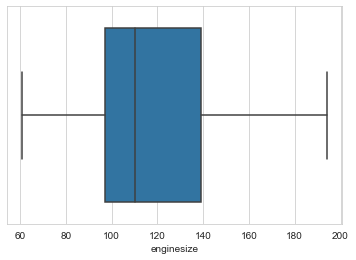

In [318]:
sns.boxplot(datadf['enginesize'])

<AxesSubplot:xlabel='horsepower'>

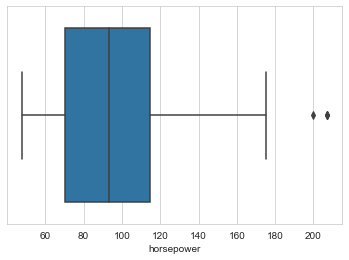

In [319]:
sns.boxplot(datadf['horsepower'])

### 
droping outliers in Horsepower

In [320]:
datadf['horsepower']>180

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Name: horsepower, Length: 194, dtype: bool

In [321]:
 sum(datadf['horsepower']>180)

4

In [322]:
datadf[datadf['horsepower']>180].index

Int64Index([105, 126, 127, 128], dtype='int64')

In [323]:
datadf.drop(datadf[datadf['horsepower']>180].index , inplace= True)

In [324]:
sum(datadf['horsepower']>180)

0

<AxesSubplot:xlabel='horsepower'>

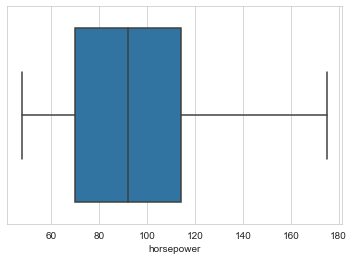

In [325]:
sns.boxplot(datadf['horsepower'])

###  Splitting of the data

In [326]:
from sklearn.linear_model import LinearRegression

In [327]:
lr = LinearRegression()

In [328]:
lr

LinearRegression()

## Simple Linear Regression

##  Enginesize

In [329]:
x = datadf['enginesize']
y=datadf['price']

In [330]:
# Importing Train and Test Split
from sklearn.model_selection import train_test_split

In [331]:
#splitting  the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=0)

In [332]:
# display the train data set 
x_train.shape

(47,)

In [333]:
# fixing the dimensions of the train and test data
x_train= x_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [334]:
#fitting the train data
M1=lr.fit(x_train,y_train)

In [335]:
M1

LinearRegression()

In [336]:
y_pred1 = lr.predict(x_test)

In [337]:
# importing r2_score
from sklearn.metrics import r2_score

In [338]:
r2_score(y_test,y_pred1)

0.5207823707224646

## Curbweight

In [339]:
x= datadf['curbweight']
y=datadf['price']

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=0)

In [342]:
x_train.shape

(47,)

In [343]:
# fixing the dimensions of the train and test data
x_train= x_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [344]:
M2 =lr.fit(x_train,y_train)

In [345]:
M2

LinearRegression()

In [346]:
y_pred2 = lr.predict(x_test)

In [347]:
from sklearn.metrics import r2_score

In [348]:
r2_score (y_test,y_pred2)

0.6554548356539811

## Horsepower

In [349]:
x=datadf['horsepower']
y=datadf['price']

In [350]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.25,random_state=0)

In [351]:
# fixing the dimensions of the train and test data
x_train= x_train.values.reshape(-1,1)
x_test= x_test.values.reshape(-1,1)
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

In [352]:
M3 =lr.fit(x_train,y_train)

In [353]:
M3

LinearRegression()

In [354]:
y_pred3=lr.predict(x_test)

In [355]:
r2_score(y_test,y_pred3)

0.4301580931971859

###  Now we will calculate the MSE (Mean Squared error ) and MAE ( Mean absolute error )

In [356]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [357]:
#mean squared error and mean absolute error for EngineSize as predictor
mse1=mean_squared_error(y_test,y_pred1)
mae1=mean_absolute_error(y_test,y_pred1)

In [358]:
print('mean squared error for EngineSize : ',mse1)
print('mean absolute error for EngineSize : ',mae1)

mean squared error for EngineSize :  14010344.32519819
mean absolute error for EngineSize :  2738.264970815139


In [359]:
#mean squared error and mean absolute error for Curbweight as predictor
mse2=mean_squared_error(y_test,y_pred2)
mae2=mean_absolute_error(y_test,y_pred2)

In [360]:
print('mean squared error for Curbweight : ',mse2)
print('mean absolute error for Curbweight : ',mae2)

mean squared error for Curbweight :  10073077.64396557
mean absolute error for Curbweight :  2130.425369024258


In [361]:
#mean squared error and mean absolute error for Horsepower as predictor
mse3=mean_squared_error(y_test,y_pred3)
mae3=mean_absolute_error(y_test,y_pred3)

In [362]:
print('mean squared error for Horsepower : ',mse3)
print('mean absolute error for Horsepower : ',mae3)

mean squared error for Horsepower :  16659823.924405819
mean absolute error for Horsepower :  2665.177851722206


###  as we have found out the MSE and MAE, now we will find out the MAPE Score for all the three models 

In [363]:
def mape(y_test,y_predict):
    result=np.abs((y_test-y_predict)/y_test)*100
    print('Mape Score',np.mean(result))

In [364]:
# EngineSize
mape(y_test,y_pred1)

Mape Score 21.48114900343188


In [365]:
# Curbweight
mape(y_test,y_pred2)

Mape Score 15.659266423062704


In [366]:
# Horsepower 
mape(y_test,y_pred3) 

Mape Score 19.815841016301587


### MAPE score we can see that, the second model has got the lowest MAPE score so now we will select the second model Curbweight

### As we seen above we have got top three feature after performing feature selection so to perform MLR we will use three feature which are "curbweight","enginesize" and "horsepower

In [367]:
x=datadf[['enginesize','curbweight','horsepower']]
y=datadf.loc[:,['price']]

In [368]:
x.head()

,enginesize,curbweight,horsepower
0,130,2548,111
1,130,2548,111
2,152,2823,154
3,109,2337,102
4,136,2824,115


In [369]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [370]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [371]:
Model=lr.fit(x_train,y_train)

In [372]:
Model

LinearRegression()

In [373]:
y_predict=lr.predict(x_test)

In [374]:
r2_score(y_test,y_predict)

0.7907940613622997

Text(0, 0.5, 'y_predict')

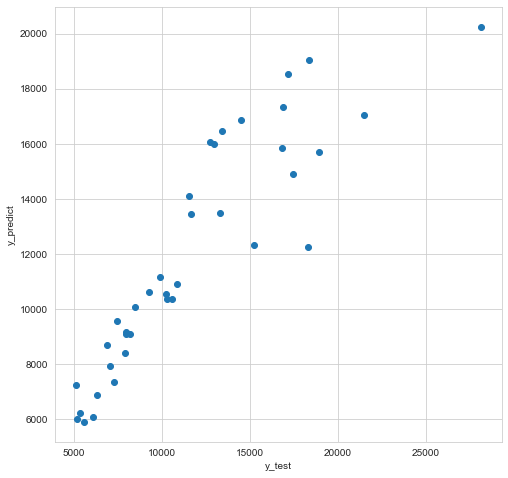

In [375]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=y_predict)
plt.xlabel('y_test' )
plt.ylabel('y_predict' )

### Lets build a MLR Model with all feature

In [376]:
datadf.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,0,2,5,3,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,5,3,5,1,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,3,2,5,2,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,3,1,5,2,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [377]:
x=datadf.drop('price',axis=1)
y=datadf.loc[:,['price']]

In [378]:
x.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,symboling,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,1,0,1,0,2,0,0,2,5,3,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,2,2,0,5,3,5,1,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,3,1,0,3,2,5,2,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,3,0,0,3,1,5,2,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [379]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [380]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [381]:
Model=lr.fit(x_train,y_train)

In [382]:
Model

LinearRegression()

In [383]:
y_predict=lr.predict(x_test)

In [384]:
r2_score(y_test,y_predict)

0.7910205063667063

### lets perform minmax scaling so that we can  scaledown the features between 0 to 1

In [385]:
from sklearn.preprocessing import MinMaxScaler

In [386]:
scalar=MinMaxScaler()

In [387]:
x_scaled=scalar.fit_transform(x)

In [388]:
x_scaled

array([[1.        , 0.        , 1.        , ..., 0.34693878, 0.15151515,
        0.20588235],
       [1.        , 0.        , 1.        , ..., 0.34693878, 0.15151515,
        0.20588235],
       [1.        , 0.        , 1.        , ..., 0.34693878, 0.09090909,
        0.17647059],
       ...,
       [1.        , 0.        , 0.        , ..., 0.55102041, 0.06060606,
        0.08823529],
       [0.        , 1.        , 0.        , ..., 0.26530612, 0.3030303 ,
        0.20588235],
       [1.        , 1.        , 0.        , ..., 0.51020408, 0.09090909,
        0.14705882]])

In [389]:
x=x_scaled
y=datadf.price

In [390]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [391]:
Min_Max_scal_model=lr.fit(x_train,y_train)

In [392]:
Min_Max_scal_model

LinearRegression()

In [393]:
# predicting on test data
y_predict=lr.predict(x_test)

In [394]:
r2_score(y_test,y_predict)

0.7910205063667036

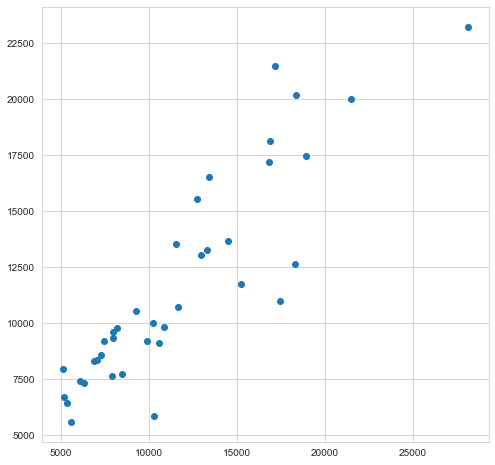

In [395]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=y_predict)

After using scaling, we can see that the scores for the model are same as we got above which is 79%
So, here we can use above method which is MLR by taking all the features

We can understand that curbweight, engine size, horsepower, are some parameters which affects the price of a car